<a href="https://colab.research.google.com/github/NamithaK03/Linear-Algebra/blob/main/19MAT105_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.graph_objs as go
import numpy.linalg as LA

## Visualization of Orthogonal Vectors
First, a 2D representation of orthogonal vectors.

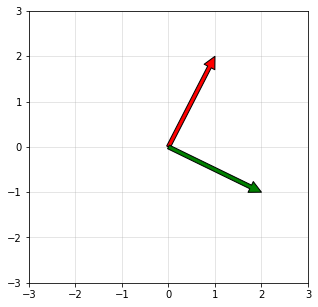

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.grid(alpha=0.4)
ax.set(xlim=(-3, 3), ylim=(-3, 3))

v1 = np.array([1,  2])
v2 = np.array([2, -1])

# Plot the orthogonal vectors
ax.annotate('', xy=v1, xytext=(0, 0), arrowprops=dict(facecolor='r'))
ax.annotate('', xy=v2, xytext=(0, 0), arrowprops=dict(facecolor='g'))
plt.show()

Check Orthogonality

In [ ]:
dot_product = np.dot(v1,v2)

print("The dot product of v1 and v2 is", dot_product )

The dot product of v1 and v2 is 0


Here's an example of orthogonal vectors in 3D space.

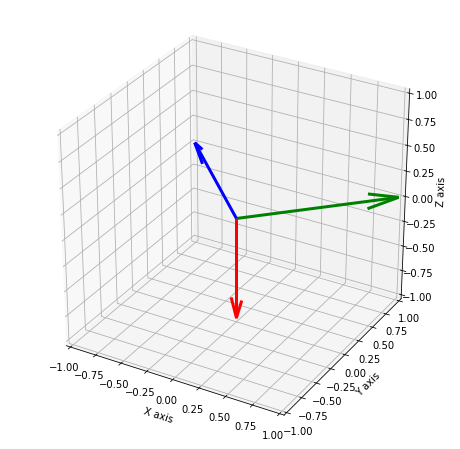

In [ ]:
# 3D representation of the orthogonal vectors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the orthogonal vectors
v1 = np.array([ 0, 0, -1])
v2 = np.array([ 1, 1, 0])
v3 = np.array([-1, 1, 0])
 
# Plot the orthogonal vectors
ax.quiver( 0, 0, 0, v1[0], v1[1], v1[2], color = 'r', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v2[0], v2[1], v2[2], color = 'g', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v3[0], v3[1], v3[2], color = 'b', lw=3, arrow_length_ratio=0.2)

ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

In [ ]:
dot_product1 = np.dot(v1,v2)

print("The dot product of v1 and v2 is", dot_product1 )
dot_product2 = np.dot(v2,v3)
print("The dot product of v2 and v3 is", dot_product2 )
dot_product3 = np.dot(v1,v3)
print("The dot product of v1 and v3 is", dot_product3 )

The dot product of v1 and v2 is 0
The dot product of v2 and v3 is 0
The dot product of v1 and v3 is 0


## Dot product
### Definition
The dot product (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Another way to calculate the dot product is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

### In python
The dot product is pretty simple to implement:

## Projection of vectors


The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which is equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$


In [ ]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

In [ ]:
u = np.array([2, 5])
v = np.array([3, 1])

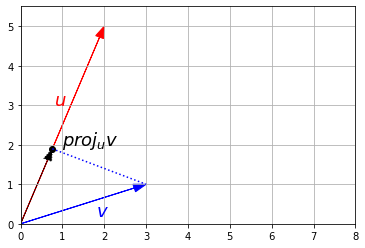

In [ ]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

### Calculating the angle between vectors
One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [ ]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


## Least Squares

### More Rows than Columns

This is the $ n \times k $ case with $ n > k $.

This case is very important in many settings, not least in the setting of linear regression (where $ n $ is the number of observations, and $ k $ is the number of explanatory variables).

Given arbitrary $ y \in \mathbb R ^n $, we seek an $ x \in \mathbb R ^k $ such that $ y = Ax $.

In this setting, the existence of a solution is highly unlikely.

Without much loss of generality, let’s go over the intuition focusing on the case where the columns of
$ A $ are linearly independent.

It follows that the span of the columns of $ A $ is a $ k $-dimensional subspace of $ \mathbb R ^n $.

When $ n > k $ case we usually give up on existence.

However, we can still seek the best approximation, for example, an
$ x $ that makes the distance $ \| y - Ax\| $ as small as possible.

To solve this problem, one can use either calculus or the theory of orthogonal
projections.

The solution is known to be $ \hat x = (A'A)^{-1}A'y $

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

## Use direct inverse method

In [ ]:
from scipy import optimize
plt.style.use('seaborn-poster')
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [ ]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [ ]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.55723589]
 [0.97837923]]


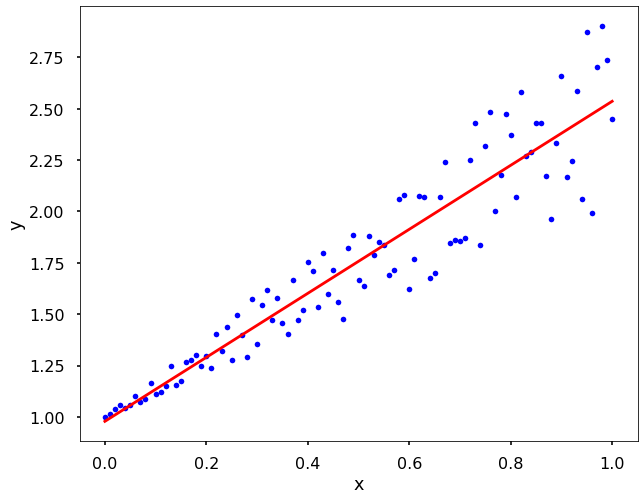

In [ ]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Use numpy.linalg.lstsq

To obtain the least-squares solution $ \hat x = (A'A)^{-1}A'y $,  use `linalg.lstsq(A, y)`.

In [ ]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.55723589]
 [0.97837923]]


## Gram-Schmidt Orthogonization using Numpy

In [ ]:
def gs(X):
    Q, R = np.linalg.qr(X)
    return Q

In [ ]:
m = np.array([[1,1,1,1],[0,1,1,1], [0,0,1,1]])
gs(m)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

----
**Lab Assignment - 4**
----
1. Prove that {u1,u2,u3} is an orthogonal set where
$$
u1 = \begin{pmatrix}
1\\
-1\\
0
\end{pmatrix}
,
u2 = \begin{pmatrix}
1\\
1\\
0
\end{pmatrix}
,
u3 = \begin{pmatrix}
0\\
0\\
1
\end{pmatrix}
$$

2. Let
$$
y = \begin{pmatrix}
7\\
6
\end{pmatrix}
,
u = \begin{pmatrix}
2\\
1
\end{pmatrix}
$$

  Compute the orthogonal projection ̂y of y onto u.

3. Let 
$$
u1 = \begin{pmatrix}
3\\
0\\
1 
\end{pmatrix}
,
u2 = \begin{pmatrix}
0\\
1\\
0
\end{pmatrix}
,
y = \begin{pmatrix}
0\\
3\\
10
\end{pmatrix}
$$

  Observe that {u1,u2} is an orthogonal basis for W= Span{u1,u2}. Write y as the sum of a vector in W and a vector orthogonal to W

4. Find the closest point to y in Span{u1,u2} where
$$
y = \begin{pmatrix}
2\\
4\\
0\\
-2 
\end{pmatrix}
,
u1 = \begin{pmatrix}
1\\
1\\
0\\
0
\end{pmatrix}
,
u2 = \begin{pmatrix}
0\\
0\\
1\\
1
\end{pmatrix}
$$

5. Let W = Span{x1,x2}, where
$$
x1 = \begin{pmatrix}
1\\
1\\
1
\end{pmatrix}
,
x2 = \begin{pmatrix}
1/3\\
1/3\\
-2/3
\end{pmatrix}
$$

  Construct an orthonormal basis for W.

6. Find the closest line to the points (0,6), (1,0) and (2,0).
7. Find a least squares solution to the system Ax = b, where
$$
A = \begin{pmatrix}
1 & 1\\
1 & 1\\
0 & 1
\end{pmatrix}
,
b = \begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
$$
8. Find a least sqaures solution of Ax=b for
$$
A = \begin{pmatrix}
1 & 1 &0 & 0\\
1 & 1 &0 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 &1
\end{pmatrix}
,
b = \begin{pmatrix}
-3\\
-1\\
0\\
2\\
5\\
1
\end{pmatrix}
$$
----